In [1]:
import numpy as np
import keras
import tensorflow as tf
from keras.layers.recurrent import SimpleRNN
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense

from matplotlib import pyplot as plt

from sklearn.utils import shuffle

C:\Users\wjssm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def sin(x, T=100):
    return np.sin(2.0*np.pi*x/T)

In [3]:
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2*T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

In [4]:
T=100
f = toy_problem(T)
x=np.arange(0, 2*T + 1)

In [5]:
length_of_sequences = 2*T
maxlen = 25

data = []
target = []

for i in range(0, length_of_sequences - maxlen +1):
    data.append(f[i:i+maxlen])
    target.append(f[i+maxlen])
    
X = np.array(data).reshape(len(data), maxlen, 1)    

In [6]:
X.shape

(176, 25, 1)

In [7]:
Y = np.array(target).reshape(len(data), 1)
Y.shape

(176, 1)

In [8]:
from sklearn.model_selection import train_test_split
N_train = int(len(data)*0.9)
N_validation = len(data)-N_train
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=N_validation)

In [9]:
n_in=len(X[0][0])
n_out=len(Y[0])

In [10]:
length_of_sequences = 2*T
n_hidden=10
n_batch=5
maxlen = 25

## Keras

In [12]:
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.01))
def bias_variable(shape):
    return tf.Variable(tf.truncated_normal(shape))

In [13]:
model = Sequential() #클래스 객체인 모형 생성
model.add(SimpleRNN(n_hidden, #n_hidden개의 뉴런을 가진 RNN층을 만든다.
                  kernel_initializer=weight_variable, #weight initializer의 초기값, input의 linear transformation에 쓰인다.
                  input_shape=(maxlen, n_out))) #first layer에 input_shape 값 (25,1)의 모양으로 들어감.
model.add(Dense(n_out, kernel_initializer=weight_variable)) #출력값을 n_out개수로 묶어서 출력
model.add(Activation("linear")) #activation함수로 linear 사용

In [14]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999) #adam optimizer사용 learning rate 0.001, 
model.compile(loss="mean_squared_error", optimizer=optimizer) #loss function으로 mse사용

In [15]:
epochs = 500 #각 episode를 500번 반복
batch_size = 10 #batch size는 10개씩
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_validation, Y_validation))

Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 1s 5ms/step - loss: 0.4918 - val_loss: 0.4643
Epoch 2/500
158/158 [==============================] - 0s 504us/step - loss: 0.4481 - val_loss: 0.4175
Epoch 3/500
158/158 [==============================] - 0s 450us/step - loss: 0.3926 - val_loss: 0.3498
Epoch 4/500
158/158 [==============================] - 0s 633us/step - loss: 0.2980 - val_loss: 0.2382
Epoch 5/500
158/158 [==============================] - 0s 547us/step - loss: 0.1876 - val_loss: 0.1421
Epoch 6/500
158/158 [==============================] - 0s 599us/step - loss: 0.1051 - val_loss: 0.0762
Epoch 7/500
158/158 [==============================] - 0s 530us/step - loss: 0.0618 - val_loss: 0.0486
Epoch 8/500
158/158 [==============================] - 0s 515us/step - loss: 0.0454 - val_loss: 0.0389
Epoch 9/500
158/158 [==============================] - 0s 598us/step - loss: 0.0407 - val_loss: 0.0350
Epoch 10/500
158/158 [========

158/158 [==============================] - 0s 482us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 80/500
158/158 [==============================] - 0s 480us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 81/500
158/158 [==============================] - 0s 605us/step - loss: 0.0032 - val_loss: 0.0033
Epoch 82/500
158/158 [==============================] - 0s 595us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 83/500
158/158 [==============================] - 0s 505us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 84/500
158/158 [==============================] - 0s 513us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 85/500
158/158 [==============================] - 0s 481us/step - loss: 0.0027 - val_loss: 0.0035
Epoch 86/500
158/158 [==============================] - 0s 504us/step - loss: 0.0031 - val_loss: 0.0037
Epoch 87/500
158/158 [==============================] - 0s 513us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 88/500
158/158 [==============================] - 0s 594us/step - loss:

158/158 [==============================] - 0s 454us/step - loss: 0.0013 - val_loss: 0.0018
Epoch 158/500
158/158 [==============================] - 0s 549us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 159/500
158/158 [==============================] - 0s 516us/step - loss: 0.0012 - val_loss: 0.0019
Epoch 160/500
158/158 [==============================] - 0s 610us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 161/500
158/158 [==============================] - 0s 576us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 162/500
158/158 [==============================] - 0s 523us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 163/500
158/158 [==============================] - 0s 522us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 164/500
158/158 [==============================] - 0s 623us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 165/500
158/158 [==============================] - 0s 555us/step - loss: 0.0012 - val_loss: 0.0019
Epoch 166/500
158/158 [==============================] - 0s 557us/ste

Epoch 235/500
158/158 [==============================] - 0s 593us/step - loss: 0.0013 - val_loss: 0.0018
Epoch 236/500
158/158 [==============================] - 0s 602us/step - loss: 0.0011 - val_loss: 0.0017
Epoch 237/500
158/158 [==============================] - 0s 526us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 238/500
158/158 [==============================] - 0s 530us/step - loss: 0.0011 - val_loss: 0.0016
Epoch 239/500
158/158 [==============================] - 0s 541us/step - loss: 0.0011 - val_loss: 0.0014
Epoch 240/500
158/158 [==============================] - 0s 558us/step - loss: 0.0013 - val_loss: 0.0016
Epoch 241/500
158/158 [==============================] - 0s 538us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 242/500
158/158 [==============================] - 0s 509us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 243/500
158/158 [==============================] - 0s 473us/step - loss: 0.0011 - val_loss: 0.0014
Epoch 244/500
158/158 [==============================] 

158/158 [==============================] - 0s 515us/step - loss: 0.0011 - val_loss: 0.0014
Epoch 313/500
158/158 [==============================] - 0s 516us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 314/500
158/158 [==============================] - 0s 482us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 315/500
158/158 [==============================] - 0s 740us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 316/500
158/158 [==============================] - 0s 677us/step - loss: 0.0010 - val_loss: 0.0015
Epoch 317/500
158/158 [==============================] - 0s 605us/step - loss: 9.6227e-04 - val_loss: 0.0013
Epoch 318/500
158/158 [==============================] - 0s 577us/step - loss: 9.3233e-04 - val_loss: 0.0017
Epoch 319/500
158/158 [==============================] - 0s 820us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 320/500
158/158 [==============================] - 0s 705us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 321/500
158/158 [==============================] - 0s 8

Epoch 390/500
158/158 [==============================] - 0s 613us/step - loss: 9.9754e-04 - val_loss: 0.0016
Epoch 391/500
158/158 [==============================] - 0s 603us/step - loss: 0.0010 - val_loss: 0.0014
Epoch 392/500
158/158 [==============================] - 0s 673us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 393/500
158/158 [==============================] - 0s 818us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 394/500
158/158 [==============================] - 0s 716us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 395/500
158/158 [==============================] - 0s 734us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 396/500
158/158 [==============================] - 0s 743us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 397/500
158/158 [==============================] - 0s 869us/step - loss: 9.8320e-04 - val_loss: 0.0015
Epoch 398/500
158/158 [==============================] - 0s 821us/step - loss: 0.0010 - val_loss: 0.0017
Epoch 399/500
158/158 [========================

158/158 [==============================] - 0s 656us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 468/500
158/158 [==============================] - 0s 666us/step - loss: 9.9767e-04 - val_loss: 0.0014
Epoch 469/500
158/158 [==============================] - 0s 969us/step - loss: 0.0010 - val_loss: 0.0015
Epoch 470/500
158/158 [==============================] - 0s 730us/step - loss: 0.0011 - val_loss: 0.0014
Epoch 471/500
158/158 [==============================] - 0s 686us/step - loss: 0.0011 - val_loss: 0.0014
Epoch 472/500
158/158 [==============================] - 0s 735us/step - loss: 0.0010 - val_loss: 0.0016
Epoch 473/500
158/158 [==============================] - 0s 648us/step - loss: 0.0010 - val_loss: 0.0015
Epoch 474/500
158/158 [==============================] - 0s 736us/step - loss: 0.0010 - val_loss: 0.0014
Epoch 475/500
158/158 [==============================] - 0s 682us/step - loss: 0.0011 - val_loss: 0.0017
Epoch 476/500
158/158 [==============================] - 0s 764us

In [16]:
Z=X[:1] #X의 첫번째 값; 초기값
original = [f[i] for i in range(maxlen)] #원래 가지고 있는 sin data
predicted = [None for i in range(maxlen)] #예측하여 저장할 data

for i in range(length_of_sequences-maxlen+1):
    z_ = Z[-1:] #업데이트 되는 Z라는 list의 마지막 값 (1, 25, 1)
    y_ = model.predict(z_) #Z를 이용하여 다음 25개를 예측한 값 shape(1)
    sequence_ = np.concatenate(
       (z_.reshape(maxlen, n_in)[1:], y_), axis=0).reshape(1, maxlen, n_in)
    #z_에서 첫번째 값을 빼고, predict한 y_를 z_ 맨뒤에 붙인다. (1,25,1)
    
    Z=np.append(z_, sequence_, axis=0) #예측한 값을 붙인z_를 Z에 저장
    predicted.append(y_.reshape(-1)) #예측한 y_를 predicted에 저장

In [17]:
from matplotlib import pyplot as plt

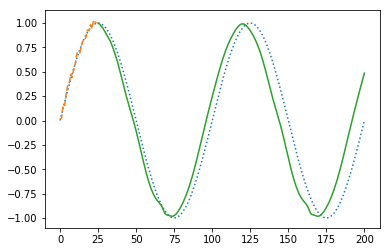

In [18]:
plt.plot(toy_problem(T, ampl=0), linestyle="dotted")
plt.plot(original, linestyle="dashed")
plt.plot(predicted)

## tensorflow

In [19]:
def inference2(x, n_batch, maxlen = None, n_hidden = None, n_out = None):
    def weight_variable(shape):
        return tf.Variable(tf.truncated_normal(shape, stddev=0.01))
    def bias_variable(shape):
        return tf.Variable(tf.truncated_normal(shape, stddev=0.01))

    
    initial_state = tf.zeros(shape = (n_batch, n_hidden)) # initial state 176x30 
    
    outputs = []
    
    n_in=1; n_out=1
    Wxh = tf.get_variable('Wxh', shape=(n_in, n_hidden),   # (n_in,n_hidden)
                      initializer=tf.contrib.layers.xavier_initializer(), dtype=tf.float32)
    Whh = tf.get_variable('Whh', shape=(n_hidden, n_hidden),  # (n_hidden, n_hidden)
                      initializer=tf.contrib.layers.xavier_initializer(), dtype=tf.float32)
    bh = tf.get_variable('bh', shape=(1, n_hidden), #(1, n_hidden)
                      initializer=tf.contrib.layers.xavier_initializer(), dtype=tf.float32)
    
    for t in range(maxlen):        
        initial_state = tf.tanh(tf.matmul(x[:, t, :],Wxh) + tf.matmul(initial_state,Whh) + bh)  #x(176,1)*Wxh(1,30) + h(176,30)*(30,30) + b => h(176,30)
        outputs.append(initial_state) #ouputs에 다 저장
         
    output = outputs[-1] # 모든 outputs값들 중 가장 마지막에 있는 값만 가져옴
    
    
    V = weight_variable([n_hidden, n_out])  # 30x1 
    c = bias_variable([n_out]) #1
    y = tf.matmul(output, V) + c       # y = output(176x30) V(30x1) + c 
    return y

In [20]:
X[:,1,:].shape

(176, 1)

In [21]:
n_in = len(X[0][0])
n_hidden = 30
n_out = len(Y[0])

x = tf.placeholder(tf.float32, shape=[None, maxlen, n_in]) # None x 25 x 1 25개씩 입력값이 들어감
t = tf.placeholder(tf.float32, shape=[None, n_out]) #output은 1개
n_batch = tf.placeholder(tf.int32, shape=[]) 

y=inference2(x, n_batch, maxlen = maxlen, n_hidden = n_hidden, n_out = 1)

In [22]:
def loss(y,t):
    mse = tf.reduce_mean(tf.square(y-t))
    return mse

def training(loss):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999)
    train_step = optimizer.minimize(loss)
    return train_step

In [23]:
loss = loss(y,t)
train_step = training(loss)

In [30]:
epochs = 1000
batch_size = 10

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

n_batches = N_train // batch_size  # 158개/10 의 몫인 15번의 배치를 돌리겠다.

In [31]:
my_loss = []
for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i* batch_size
        end = start + batch_size
    
    sess.run(train_step, feed_dict={
        x: X_[start:end], 
        t: Y_[start:end],
        n_batch: batch_size
    })                        
    
    val_loss = loss.eval(session=sess, feed_dict={
        x: X_validation, 
        t: Y_validation, 
        n_batch: N_validation
    })
    
    my_loss.append(val_loss)
    print("epoch:", epoch, "validation loss:", val_loss)

epoch: 0 validation loss: 0.50301176
epoch: 1 validation loss: 0.49829176
epoch: 2 validation loss: 0.49303988
epoch: 3 validation loss: 0.48759332
epoch: 4 validation loss: 0.4829152
epoch: 5 validation loss: 0.47875315
epoch: 6 validation loss: 0.47449848
epoch: 7 validation loss: 0.46919808
epoch: 8 validation loss: 0.46298176
epoch: 9 validation loss: 0.45561266
epoch: 10 validation loss: 0.44547912
epoch: 11 validation loss: 0.4339796
epoch: 12 validation loss: 0.42101324
epoch: 13 validation loss: 0.4068418
epoch: 14 validation loss: 0.39182174
epoch: 15 validation loss: 0.37693083
epoch: 16 validation loss: 0.36211953
epoch: 17 validation loss: 0.34743384
epoch: 18 validation loss: 0.3330282
epoch: 19 validation loss: 0.3184719
epoch: 20 validation loss: 0.30383968
epoch: 21 validation loss: 0.28970873
epoch: 22 validation loss: 0.27610755
epoch: 23 validation loss: 0.26215374
epoch: 24 validation loss: 0.24837857
epoch: 25 validation loss: 0.23506397
epoch: 26 validation loss: 

epoch: 213 validation loss: 0.004116117
epoch: 214 validation loss: 0.00409959
epoch: 215 validation loss: 0.0041764453
epoch: 216 validation loss: 0.0042181825
epoch: 217 validation loss: 0.0042330804
epoch: 218 validation loss: 0.004045894
epoch: 219 validation loss: 0.003976172
epoch: 220 validation loss: 0.0038589602
epoch: 221 validation loss: 0.0036293007
epoch: 222 validation loss: 0.003458933
epoch: 223 validation loss: 0.0033316063
epoch: 224 validation loss: 0.0032952642
epoch: 225 validation loss: 0.0033274207
epoch: 226 validation loss: 0.003434541
epoch: 227 validation loss: 0.0035785225
epoch: 228 validation loss: 0.0036498953
epoch: 229 validation loss: 0.0037583495
epoch: 230 validation loss: 0.003654131
epoch: 231 validation loss: 0.0034477115
epoch: 232 validation loss: 0.003274567
epoch: 233 validation loss: 0.0031338509
epoch: 234 validation loss: 0.0031375939
epoch: 235 validation loss: 0.0033595536
epoch: 236 validation loss: 0.003706947
epoch: 237 validation loss

epoch: 415 validation loss: 0.0016740721
epoch: 416 validation loss: 0.0017644209
epoch: 417 validation loss: 0.0019046521
epoch: 418 validation loss: 0.0020329366
epoch: 419 validation loss: 0.0021573624
epoch: 420 validation loss: 0.00219315
epoch: 421 validation loss: 0.0021190436
epoch: 422 validation loss: 0.002062577
epoch: 423 validation loss: 0.0020121397
epoch: 424 validation loss: 0.0020248762
epoch: 425 validation loss: 0.0020650108
epoch: 426 validation loss: 0.0020928152
epoch: 427 validation loss: 0.0021010328
epoch: 428 validation loss: 0.0021249817
epoch: 429 validation loss: 0.002149409
epoch: 430 validation loss: 0.00215322
epoch: 431 validation loss: 0.002220426
epoch: 432 validation loss: 0.0022841496
epoch: 433 validation loss: 0.0023675412
epoch: 434 validation loss: 0.002440641
epoch: 435 validation loss: 0.002503074
epoch: 436 validation loss: 0.0025623264
epoch: 437 validation loss: 0.0026579865
epoch: 438 validation loss: 0.0027387522
epoch: 439 validation los

epoch: 641 validation loss: 0.0023254445
epoch: 642 validation loss: 0.0022708352
epoch: 643 validation loss: 0.0022717218
epoch: 644 validation loss: 0.0022842316
epoch: 645 validation loss: 0.0022530365
epoch: 646 validation loss: 0.0022213687
epoch: 647 validation loss: 0.002203291
epoch: 648 validation loss: 0.0021816085
epoch: 649 validation loss: 0.002164582
epoch: 650 validation loss: 0.0021702135
epoch: 651 validation loss: 0.0021599708
epoch: 652 validation loss: 0.002203814
epoch: 653 validation loss: 0.002272227
epoch: 654 validation loss: 0.002347024
epoch: 655 validation loss: 0.0023362928
epoch: 656 validation loss: 0.002267756
epoch: 657 validation loss: 0.0022333562
epoch: 658 validation loss: 0.0020333917
epoch: 659 validation loss: 0.0018663949
epoch: 660 validation loss: 0.0018605238
epoch: 661 validation loss: 0.0019211367
epoch: 662 validation loss: 0.002080548
epoch: 663 validation loss: 0.0020960374
epoch: 664 validation loss: 0.0020565735
epoch: 665 validation l

epoch: 868 validation loss: 0.0027525267
epoch: 869 validation loss: 0.0027044474
epoch: 870 validation loss: 0.0026785082
epoch: 871 validation loss: 0.002738989
epoch: 872 validation loss: 0.0027804694
epoch: 873 validation loss: 0.002924893
epoch: 874 validation loss: 0.0030119563
epoch: 875 validation loss: 0.002918427
epoch: 876 validation loss: 0.0028024223
epoch: 877 validation loss: 0.0026013022
epoch: 878 validation loss: 0.002470247
epoch: 879 validation loss: 0.0024800987
epoch: 880 validation loss: 0.0026328426
epoch: 881 validation loss: 0.002857898
epoch: 882 validation loss: 0.0029956102
epoch: 883 validation loss: 0.0030820079
epoch: 884 validation loss: 0.0029949923
epoch: 885 validation loss: 0.002624919
epoch: 886 validation loss: 0.00225602
epoch: 887 validation loss: 0.0021018567
epoch: 888 validation loss: 0.0020377433
epoch: 889 validation loss: 0.0020232506
epoch: 890 validation loss: 0.0019388536
epoch: 891 validation loss: 0.0018487523
epoch: 892 validation lo

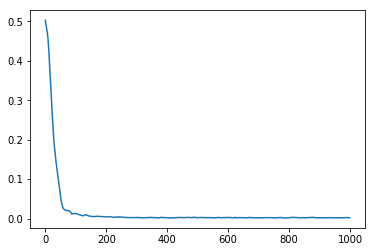

In [32]:
plt.plot(my_loss) 

In [36]:
Z=X[:1]
Z.shape
original = [f[i] for i in range(maxlen)] # f[0]~f[24]  25개 출력
predicted = [None for i in range(maxlen)]

In [34]:
for i in range(length_of_sequences - maxlen +1):
    z_ = Z[-1:]
    y_ = y.eval(session=sess, feed_dict={
        x: Z[-1:], 
        n_batch: 1
    })
    
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_), axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

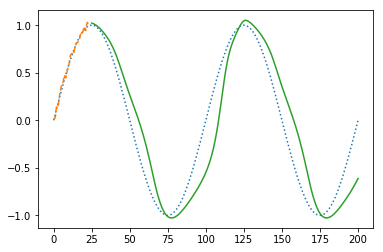

In [35]:
plt.plot(toy_problem(T=100, ampl=0), linestyle="dotted")
plt.plot(original, linestyle="dashed")
plt.plot(predicted)